# **Initial Exploratory Data Analysis (EDA)**

## **Project Setup**

In [66]:
# Libraries import 
%load_ext autoreload
%autoreload 2
import sys, os
from pathlib import Path

sys.path.append(os.path.abspath(os.path.join('..')))
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from watermark.dataset import DataHandler
from watermark.dataset import MissingValueAnalyzer
from watermark.features import DataFrameAnalyzer
from watermark.features import DataStatistics
from watermark.plots import PlotHandler


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
dh = DataHandler()

In [3]:
print("Directorio de trabajo actual:", os.getcwd())


Directorio de trabajo actual: d:\01_PosGrado_TEC\05_Ene_Mar_2025\00_Proyecto_Integrador\01_Reto\watermarking\notebooks


In [4]:
data_dict = dh.load_data(Path("../data/raw"), "emothaw_data.pkl")

2025-01-26 20:09:40.490 | INFO     | watermark.dataset:load_data:50 - Loading data from ..\data\raw\emothaw_data.pkl
2025-01-26 20:09:40.673 | SUCCESS  | watermark.dataset:load_data:55 - Data loaded successfully from ..\data\raw\emothaw_data.pkl


In [39]:
# Recorrer las claves
for clave in data_dict:
    print(clave)

t1_data
t2_data
t3_data
t4_data
t5_data
t6_data
t7_data


In [61]:
# Recorrer los valores
print("Cantidad de Tareas: ",len(data_dict['t1_data']))

Cantidad de Tareas:  129


In [62]:
print("Largo de Datos: ", len(data_dict["t1_data"][0]))
data_dict["t1_data"][0].head(10) # Ejemplo de un dataframe con los datos del usuario 1 de la tarea 1

Largo de Datos:  1474


,Y,X,Azimuth,Altitude,Pressure
0,4730.0,6786.0,158.241758,172.434018,67.0
1,4735.0,6800.0,158.241758,175.953079,148.0
2,4735.0,6806.0,158.241758,175.953079,193.0
3,4736.0,6809.0,158.241758,175.953079,228.0
4,4736.0,6813.0,158.241758,175.953079,270.0
5,4736.0,6818.0,159.120879,175.953079,306.0
6,4736.0,6824.0,159.120879,175.953079,341.0
7,4736.0,6830.0,159.120879,175.953079,365.0
8,4736.0,6835.0,159.120879,175.953079,381.0
9,4736.0,6838.0,159.120879,175.953079,395.0


- Revisando el ejemplo anterior podemos analizar los siguientes datos de nuestra base de datos de uso: Contamos con 7 usuarios que hicieron una serie de 129 "Tareas" las cuales involucraban la escritura de palabras o patrones en promedio. Cada una de esta tareas cuenta con una cantidad de muestras de 1474 con base a la primera tarea.

## **Análisis Descriptivo**

In [47]:
data_watermark = data_dict["t1_data"][0] # Cargamos la primera tarea del primer usuario
# Cargamos los datos a nuestros objetos "Handlers"
ph_df = PlotHandler(data_watermark)
mva_df = MissingValueAnalyzer(data_watermark)

### **¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?**

- No se identifican valores faltantes marcados como NaN en el dataset lo que nos indica que cada registro es valido y se realizó un buen trabajo de muestreo para los datos de este usuario en particular.

In [52]:
mva_df.get_missing_columns()

Y: 0.000 %
X: 0.000 %
Azimuth: 0.000 %
Altitude: 0.000 %
Pressure: 0.000 %


### **¿Cuáles son las estadísticas resumidas del conjunto de datos?**
Contamos con 5 estadisticas que se miden en el conjunto de datos, para cada :
- Y --> Siendo la posición de la pluma en Y (Númerica)
- X --> Siendo la posición de la pluma en X (Númerica)
- Azimuth --> Ángulo de orientación de la pluma (Númerica) 
- Altitude --> Altitud a la que se sujetaba la pluma (Númerica)
- Pressure --> Presión que se realizo al sujetar la pluma. (Númerica)

A continuación utilizando una función de resumen damos los datos generales acerca de estas variables dentro del dataset.

In [11]:
mva_df.statistics_resume().T

Estadisticas


,count,mean,std,min,25%,50%,75%,max
Y,1474.0,3319.070556,1469.287910,0.000000,2305.000000,3504.500000,4668.750000,5126.000000
X,1474.0,4390.103799,2124.282037,0.000000,3134.000000,4178.000000,6062.750000,8026.000000
Azimuth,1474.0,171.206704,18.865782,138.901099,160.879121,167.032967,172.307692,225.054945
Altitude,1474.0,182.060107,16.693964,105.571848,175.953079,182.991202,193.548387,207.624633
Pressure,1474.0,386.453867,308.143528,0.000000,0.000000,539.500000,657.750000,775.000000


### **¿Hay valores atípicos en el conjunto de datos?**

- Para poder observar los valores atipicos hicimos uso de un boxplot para denotar los valores que salen de los usual siendo en Azimuth y Altitude las columna que cuentan con un mayor numero de outliers lo que nos idicaría que son valores a analizar si fue un error de captura o si son correctas que nos esten arrojando información adicional.

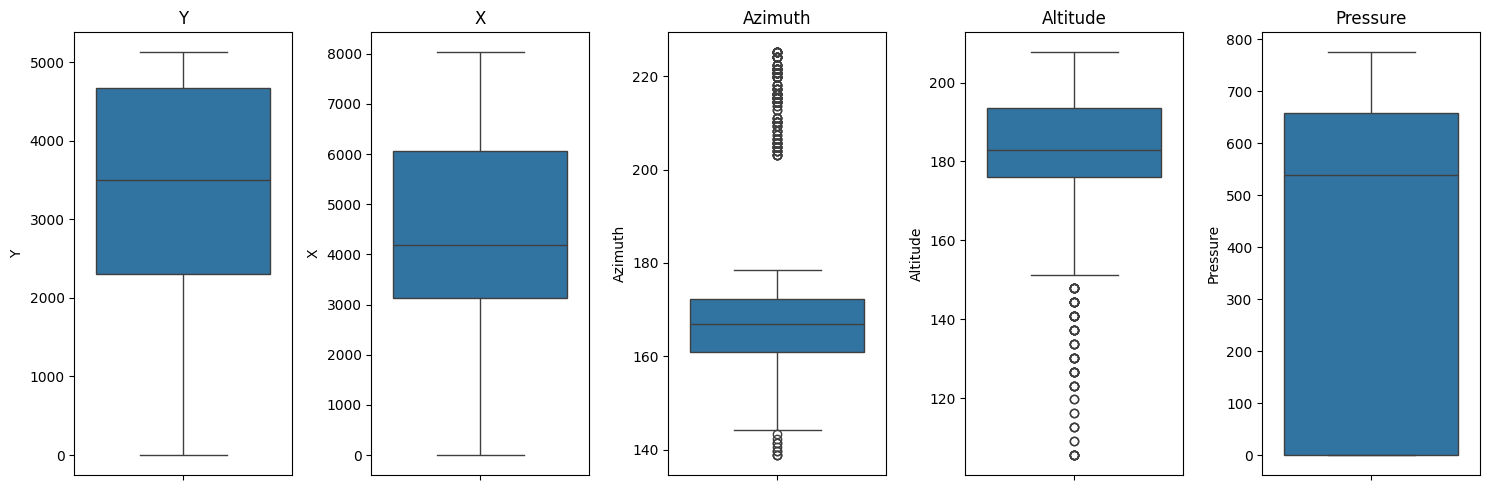

In [12]:
ph_df.plot_boxplot2()

### **¿Cuál es la cardinalidad de las variables categóricas?**

- Para este caso concreto no contamos con variables de tipo categóricas por lo que no se puede responder esta pregunta puntual.

### **¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?**
- Para observar la distribución de los datos y si existe algun tipo de sego aplicamos un analísis utilizando histogramas y visualizaciones de tipo Q-Q para observar la distribución de los datos.

- Observando los resultados podemos observar que todos nuestros datos tienen pequeños sesgos aunque el dato que puede ser más preocupante a simple vista al contar con una gran cantidad de datos en ese origen es acerca de "Pressure" ya que este cuenta con una gran cantidad de valores de ceros.


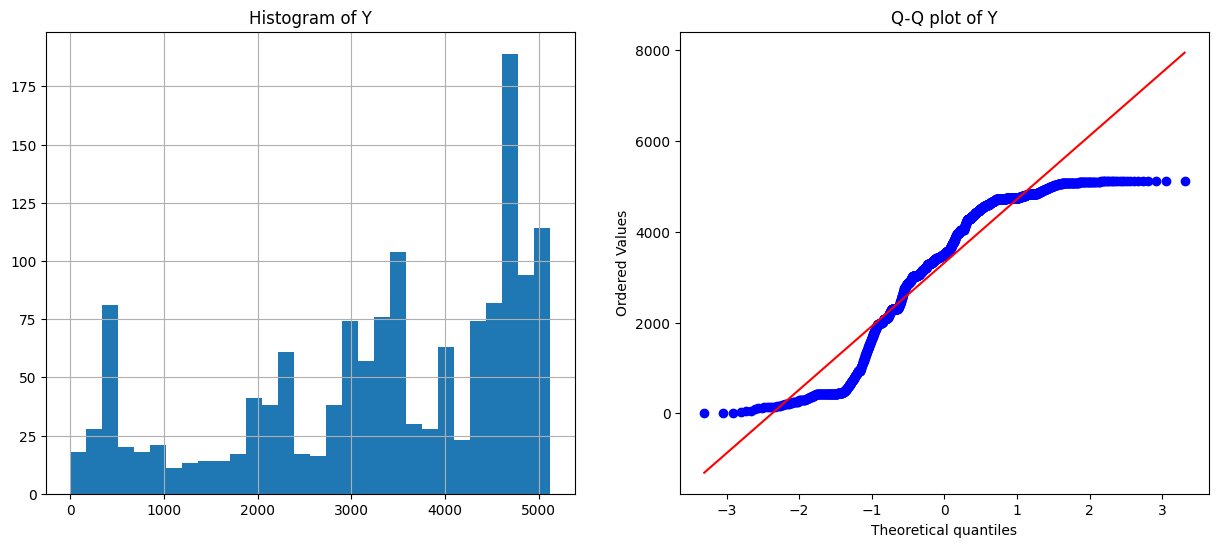

In [13]:
ph_df.diagnostic_plots("Y")

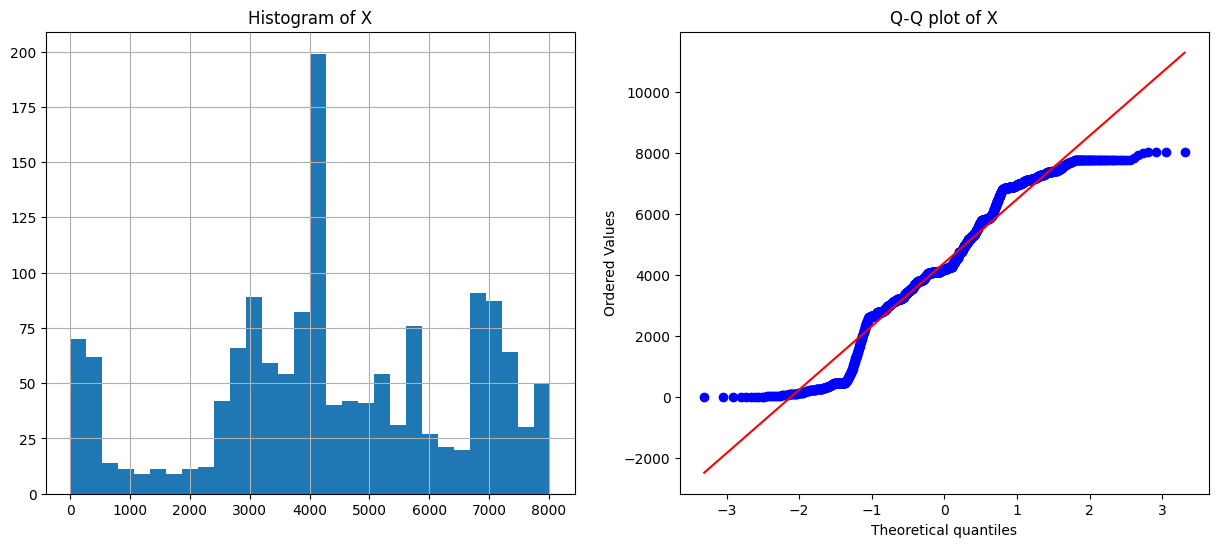

In [14]:
ph_df.diagnostic_plots("X")

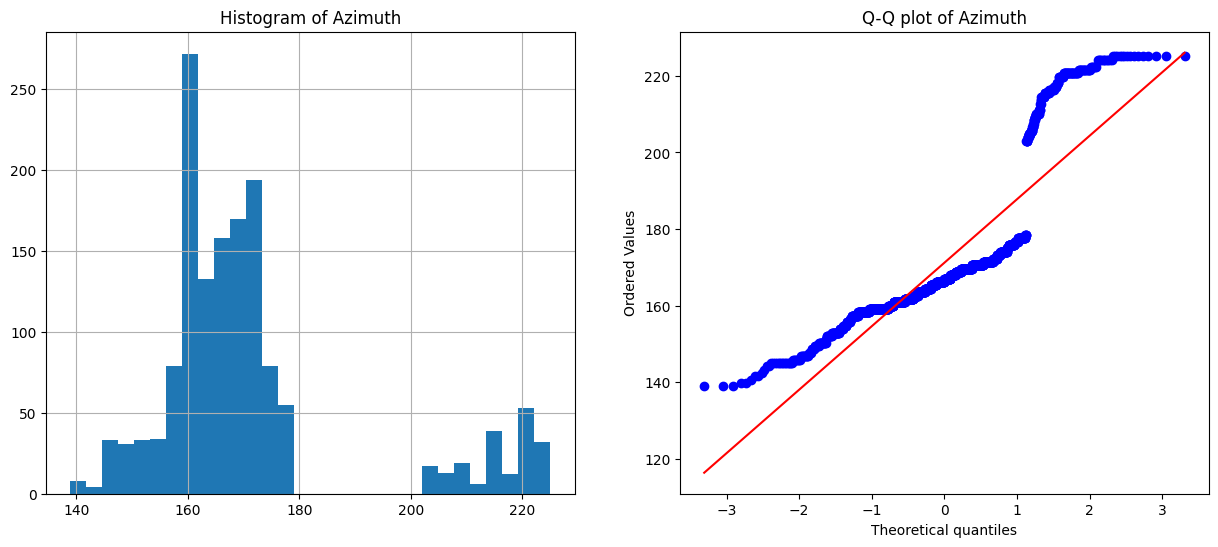

In [15]:
ph_df.diagnostic_plots("Azimuth")

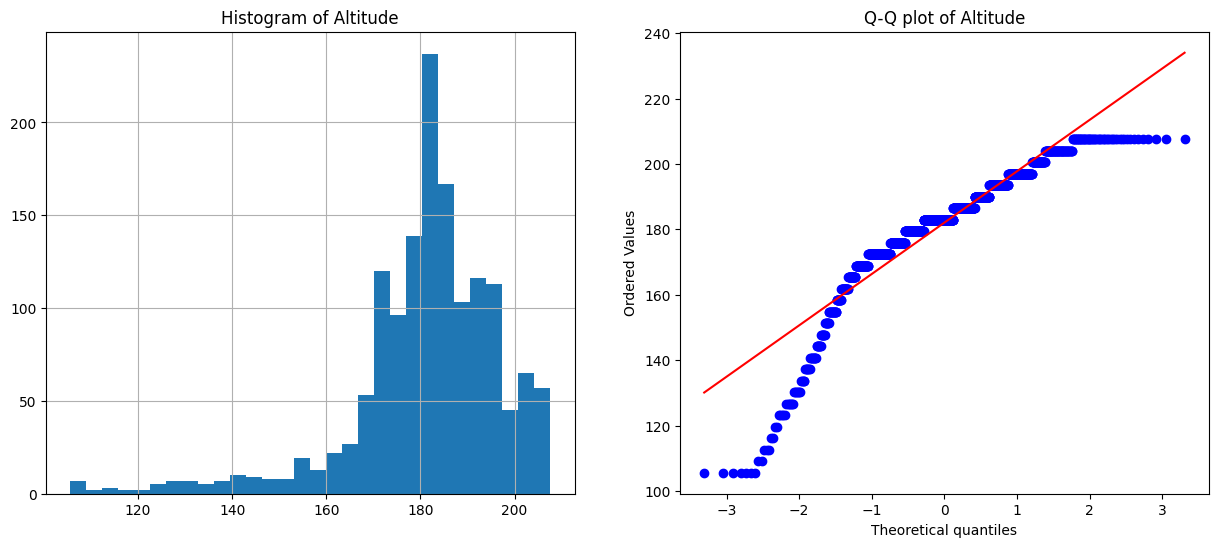

In [16]:
ph_df.diagnostic_plots("Altitude")

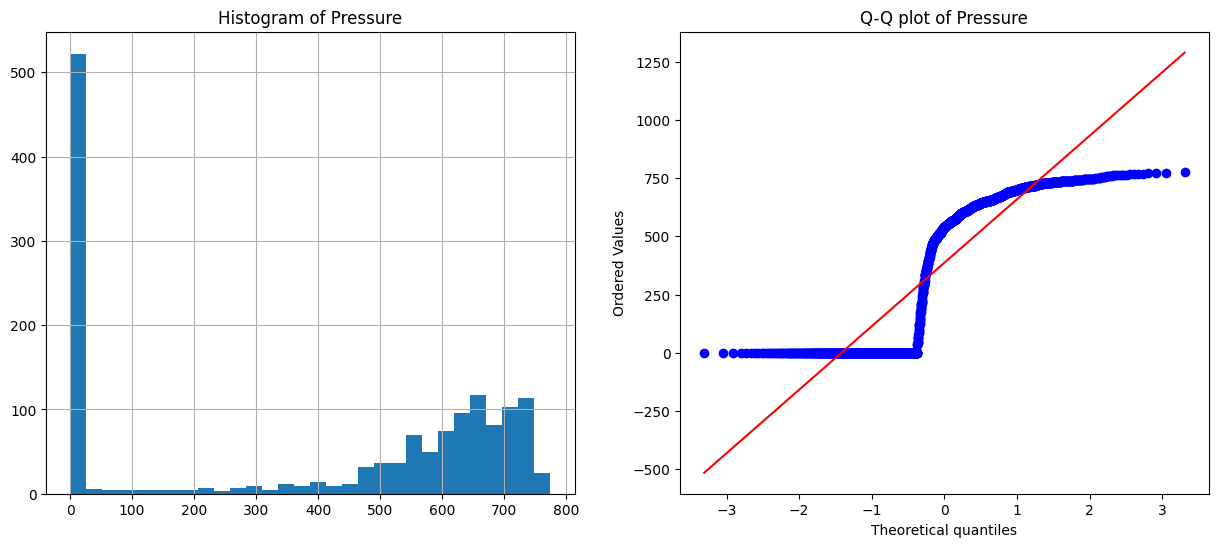

In [17]:
ph_df.diagnostic_plots("Pressure")

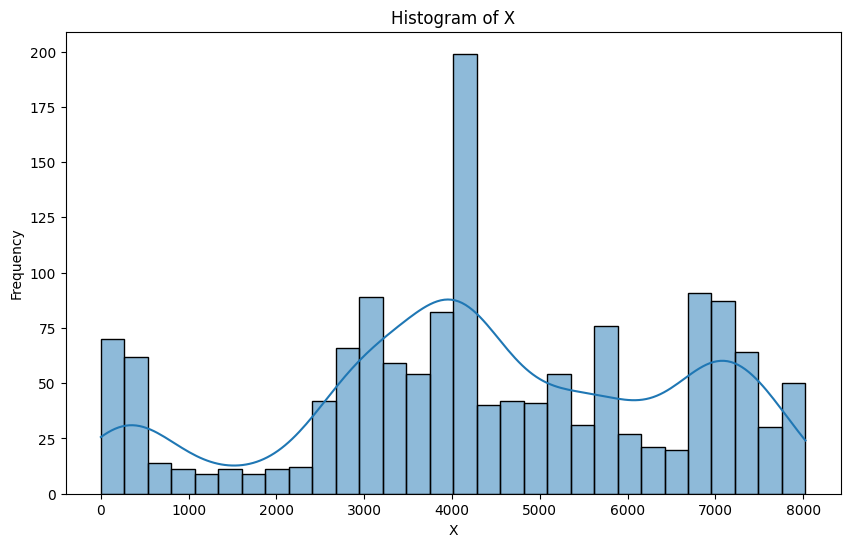

In [18]:
ph_df.plot_hist(column='X', save=False)

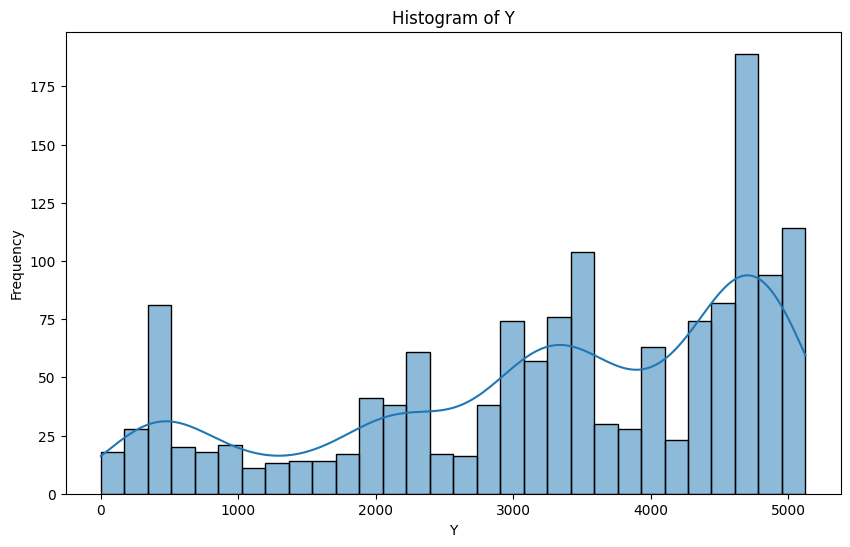

In [19]:
ph_df.plot_hist(column='Y', save=False)

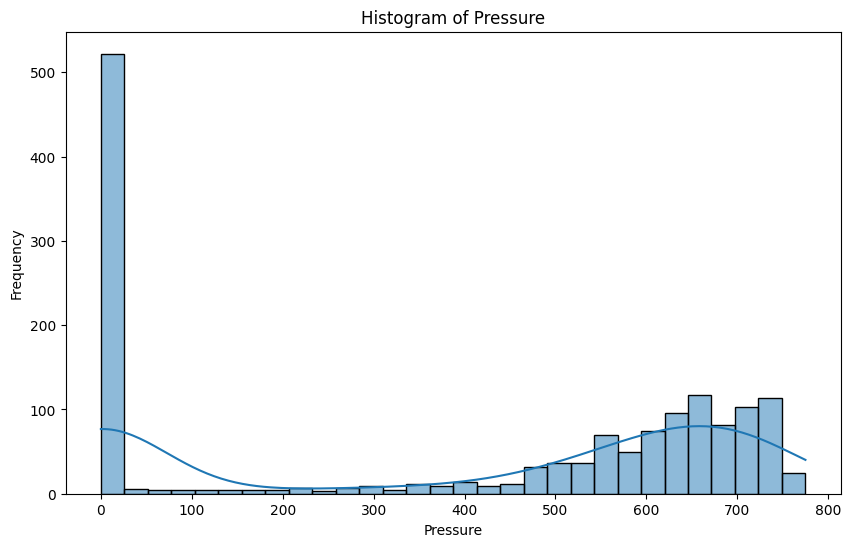

In [20]:
ph_df.plot_hist(column='Pressure', save=False)

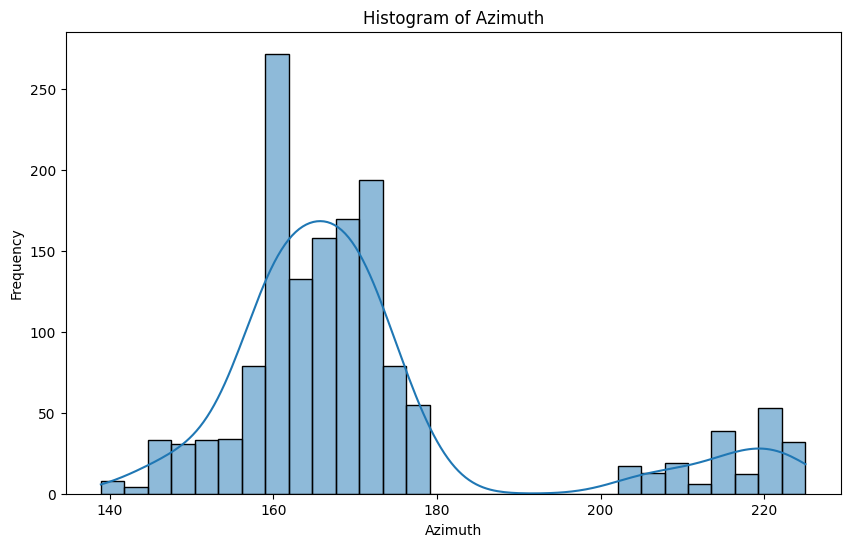

In [21]:
ph_df.plot_hist(column='Azimuth', save=False)

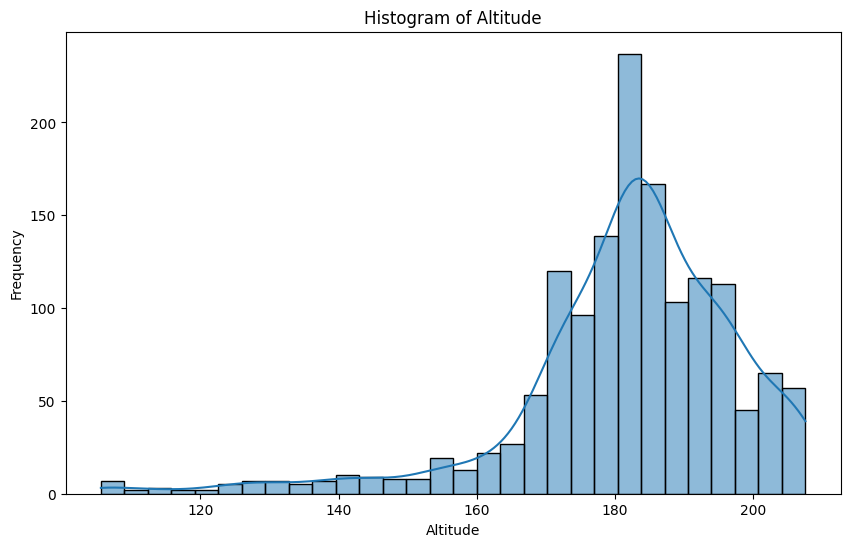

In [22]:
ph_df.plot_hist(column='Altitude', save=False)

### **¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).**

* No se tiene una dimension de tiempo en el dataset

## Analisis Bivariado 

#### **¿Cómo se distribuyen los datos en función de diferentes categorías? (análisis bivariado)**

In [79]:
# Extraer los datos
data = data_dict["t1_data"][0]

           Y       X     Azimuth    Altitude  Pressure Pressure_cat
0     4730.0  6786.0  158.241758  172.434018      67.0         Baja
1     4735.0  6800.0  158.241758  175.953079     148.0         Baja
2     4735.0  6806.0  158.241758  175.953079     193.0         Baja
3     4736.0  6809.0  158.241758  175.953079     228.0         Baja
4     4736.0  6813.0  158.241758  175.953079     270.0        Media
...      ...     ...         ...         ...       ...          ...
1469  2083.0    88.0  165.274725  207.624633     762.0         Alta
1470  2090.0    81.0  165.274725  207.624633     746.0         Alta
1471  2093.0    77.0  165.274725  207.624633     714.0         Alta
1472  2094.0    75.0  165.274725  207.624633     650.0         Alta
1473  2094.0    75.0  165.274725  207.624633     454.0        Media

[1474 rows x 6 columns]


In [72]:
# Verificar si hay valores nulos en las columnas 'X' y 'Y'
print(data[['X', 'Y']].isnull().sum())

X    0
Y    0
dtype: int64


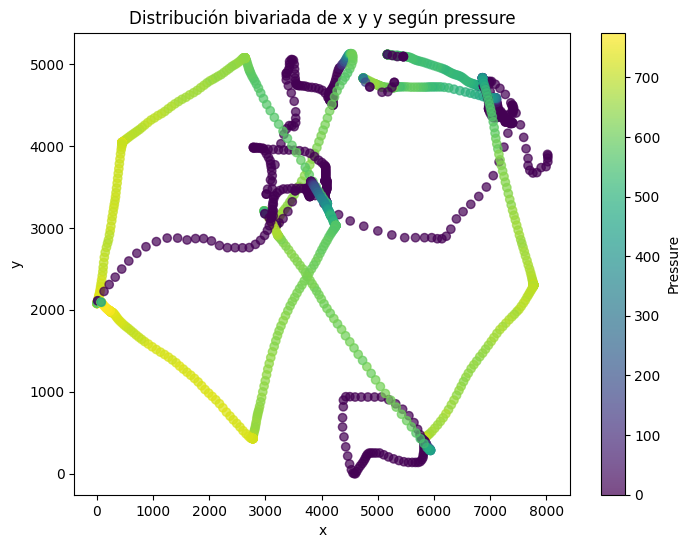

In [73]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data["X"], data["Y"], c=data["Pressure"], cmap="viridis", alpha=0.7)
plt.colorbar(scatter, label="Pressure")
plt.title("Distribución bivariada de x y y según pressure")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

* La intensidad del color (del morado al amarillo) indica los valores de presión. Las regiones con valores altos de pressure (amarillo) parecen concentrarse en algunas trayectorias específicas, mientras que los valores bajos (morado) están distribuidos en otras áreas. <br>
* Los puntos forman trayectorias o patrones específicos que podrían representar movimientos o caminos (trazo). Esto sugiere que las variables x y y están relacionadas con la posición en un espacio bidimensional.<br>
* Parece haber un rango amplio de valores para x y y, lo que implica que los datos están dispersos en un espacio relativamente grande.<br>
* Las trayectorias no están uniformemente distribuidas; algunas áreas tienen mayor densidad de puntos.

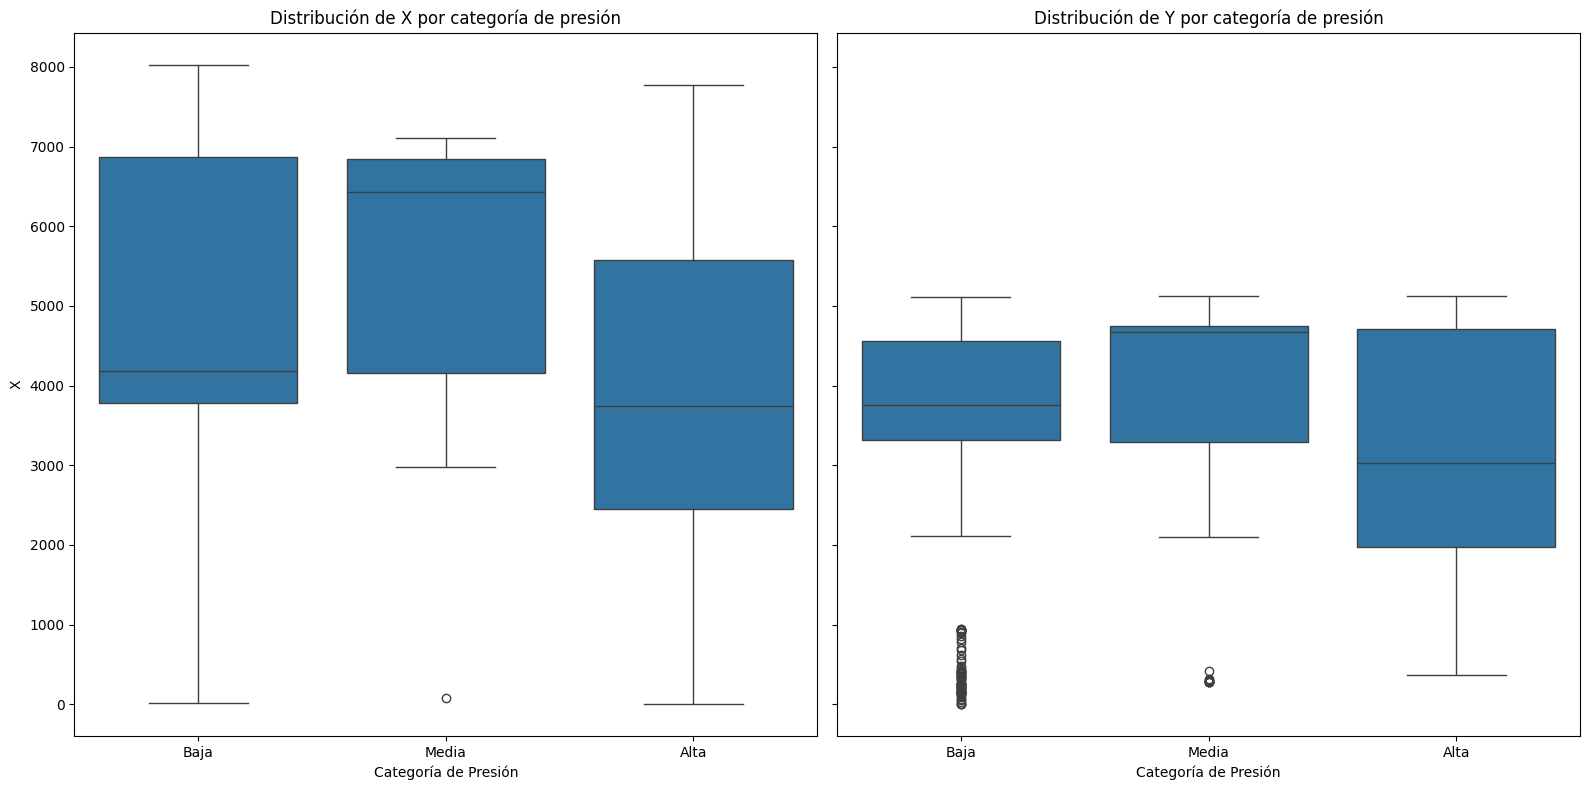

In [74]:
data["Pressure_cat"] = pd.cut(data["Pressure"], bins=3, labels=["Baja", "Media", "Alta"]) # Crear categorías de presión en base a los cuantiles

# gráficas en un solo lienzo
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Gráfica de distribución de X por categorías de presión
sns.boxplot(ax=axes[0], x="Pressure_cat", y="X", data=data)
axes[0].set_title("Distribución de X por categoría de presión")
axes[0].set_xlabel("Categoría de Presión")
axes[0].set_ylabel("X")

# Gráfica de distribución de Y por categorías de presión
sns.boxplot(ax=axes[1], x="Pressure_cat", y="Y", data=data)
axes[1].set_title("Distribución de Y por categoría de presión")
axes[1].set_xlabel("Categoría de Presión")
axes[1].set_ylabel("Y")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

* Para la variable X despues de categorizar se observa que la informacion se encuntentra en su maypria en la presion bajaseguida de la presion media
* Ahora para la variable en Y en relación con la presion tenemos que la presion predominante es en la categoria media, seguida de la presion alta.

In [80]:
# Distribucion de las varibales en el dataset  
# Extraer los datos
data_dict = dh.load_data(Path("../data/raw"), "emothaw_data.pkl")
data = data_dict["t1_data"][0]
correlation_matrix = data.corr()
print(correlation_matrix)

2025-01-26 21:30:46.789 | INFO     | watermark.dataset:load_data:51 - Loading data from ..\data\raw\emothaw_data.pkl
2025-01-26 21:30:47.102 | SUCCESS  | watermark.dataset:load_data:56 - Data loaded successfully from ..\data\raw\emothaw_data.pkl
                 Y         X   Azimuth  Altitude  Pressure
Y         1.000000  0.138323  0.326383 -0.294331 -0.212166
X         0.138323  1.000000  0.220160 -0.485427 -0.266314
Azimuth   0.326383  0.220160  1.000000 -0.258933  0.012865
Altitude -0.294331 -0.485427 -0.258933  1.000000  0.546937
Pressure -0.212166 -0.266314  0.012865  0.546937  1.000000


## Correlaciones entre variables (Task 1)
### **¿Hay correlación entre las variables dependientes e independientes?**

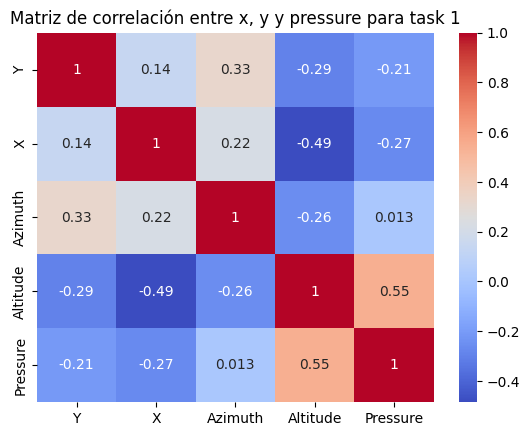

In [81]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación entre x, y y pressure para task 1")
plt.show()

La matriz de correlación muestra la relación entre las variables en el dataset para el "task 1" como muestra de las orrelaciones en el dataset.<br>

1. Correlación entre "Pressure" y "Altitude":<br>

Existe una correlación positiva moderada de 0.55 entre "Pressure" y "Altitude". Esto sugiere que, a medida que aumenta la altitud, también aumenta la presión.<br>

2. Relación débil entre las demás variables:<br>

La mayoría de las correlaciones entre "X", "Y", "Azimuth" y otras variables son bastante débiles (valores cercanos a 0). Esto indica que estas variables no tienen una relación lineal fuerte entre sí.<br>

3. Correlación negativa notable entre "X" y "Altitude":<br>

La correlación de -0.49 entre "X" y "Altitude" indica que hay una relación inversa moderada. Es decir, a medida que aumenta "X", la "Altitude" tiende a disminuir.<br>

4. Relación independiente para "Azimuth":<br>

"Azimuth" no muestra correlaciones significativas con ninguna variable (valores cercanos a 0). Esto podría sugerir que esta variable varía de manera más independiente respecto a las demás.<br>


### **¿Se deberían normalizar las imágenes para visualizarlas mejor?**

* No se esta trabajando con imagenes en este proyecto solo con los puntos de la escritura, presion, altitud y angulo(Azimuth) en el que se realizo el trazo.


### **¿Hay desequilibrio en las clases de la variable objetivo?**

Dado que todas las variables en este proyecto son de tipo flotante, este cuestionamiento no aplica directamente, ya que no se cuenta con variables categóricas que representen clases específicas. Sin embargo, es importante asegurarse de que la distribución de la variable objetivo sea analizada en términos de su rango y valores predominantes, especialmente si esta variable es continua pero presenta agrupaciones o sesgos significativos que podrían influir en el modelo. **Asi mismo la varibale objetivo sera producida a partir de estos datos como el resultado de que se identifique la marca de agua asi como su timestamp.**

Por otro lado, aunque este análisis no se aplica directamente al balance de clases, se debe prestar atención a la homogeneización de los datasets utilizados en cada tarea. Es fundamental asegurarse de que los datos tengan el mismo tamaño, estructura y rangos similares, ya que diferencias significativas entre ellos podrían generar inconsistencias durante el entrenamiento y evaluación del modelo.

Para lograr esto, se procesaran los datos de la siguiente forma:<br>

Normalizar o estandarizar los datos si los rangos de las variables son muy distintos.<br>
Asegurar consistencia en el número de registros y la proporción de datos utilizados en cada tarea.<br>

En resumen, aunque el desequilibrio de clases no sea un factor relevante en este caso, asegurar una correcta preparación y homogenización de los datasets sigue siendo crucial para la calidad del modelo y la validez de los resultados.
